# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание предоставленных данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Краткий план работы:**
1. Знакомство с вводными данными
2. Предобработка данных
3. Преобразование таблицы
4. Исследовательский анализ данных
4. Общие выводы

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [82]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Прочитаем датасет используя соответствующий разделитель.  
Взглянем на первые пять строчек таблицы.

In [83]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Посмотрим на общую информацию о данных

In [84]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

**Входные данные имеют следующие проблемы:**
1. Есть пропущенные значения в категориях: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition, ponds_around3000.  
Очень много пропущенных значений. В следующем шаге попробуем от них избавиться;
2. Не верный тип данных категории is_apartment (апартаменты). Должен быть bool, а не object. Тип указан даже в описании;
3. Не верный тип данных категории first_day_exposition (дата публикации). Должен быть datetime, а не object. Чтобы мы могли с ним корректно работать;
4. Не верный тип данных категории parks_around3000 (число парков в радиусе 3 км). Должен быть int64, а не float64. Число парков не может быть дробным; 
5. Не верный тип данных категории ponds_around3000 (число водоёмов в радиусе 3 км). Должен быть int64, а не float64. То же самое, что и в предыдущем пункте: число водоёмов не может быть дробным; 
6. Не верный тип данных категории days_exposition (сколько дней было размещено объявление). Должен быть int64, а не float64. Количество дней размещения это целое число.
7. Не верный тип данных категории balcony (число балконов). Должен быть int64, а не float64. Количество балконов это целое число.

### Шаг 2. Предобработка данных

Последовательно приведём данные в таблице к нужному типу и по возможности избавимся от пропусков.  

In [85]:
def pass_percent(category):
    print(f'В категории {category}: {data[category].isnull().sum()} пропусков.')
    print('Это {0:.1%} от всех данных в столбце.'.format(data[category].isnull().sum()/len(data)))

In [86]:
pass_percent("ceiling_height")

В категории ceiling_height: 9195 пропусков.
Это 38.8% от всех данных в столбце.


Слишком большой процент, чтобы можно было удалить пропущенные значения. Логичной замены пропускам в категории "Высота потолков" так же нет, поэтому оставляем данные без изменений.

In [87]:
pass_percent("floors_total")

В категории floors_total: 86 пропусков.
Это 0.4% от всех данных в столбце.


Логичной замены пропускам в этажности домов так же нет, поэтому пока оставляем данную категорию без изменений. 
Так как процент пропущенных значений совсем маленький, в дальнейшем им можно будет пренебечь.

In [88]:
pass_percent("living_area")

В категории living_area: 1903 пропусков.
Это 8.0% от всех данных в столбце.


Логичной замены пропускам жилой площади так же нет, поэтому пока оставляем данную категорию без изменений.

In [89]:
pass_percent("is_apartment")

В категории is_apartment: 20924 пропусков.
Это 88.3% от всех данных в столбце.


Есть предположение, что люди пропускали пункт "апартаменты" если их квартира не относилась к данному виду жилья. Поэтому заменим все пропуски на False.

In [90]:
data['is_apartment'] = data['is_apartment'].fillna(False)
pass_percent("is_apartment")

В категории is_apartment: 0 пропусков.
Это 0.0% от всех данных в столбце.


Отлично, от некоторых пропусков избавились. Теперь присвоим верный тип данным в категории.

In [91]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [92]:
pass_percent("kitchen_area")

В категории kitchen_area: 2278 пропусков.
Это 9.6% от всех данных в столбце.


Возможно площадь площадь кухни не указана в квартирах студиях, так как кухня в них совмещена с комнатой.

In [93]:
display(data[data['studio'] == True]["kitchen_area"].unique())
display(data['studio'].value_counts())

array([nan])

False    23550
True       149
Name: studio, dtype: int64

Так и есть. Но студий у нас не много, всего 149. Все остальные пропущенные площади кухонь для нас загадка. Оставляем без изменений.

In [94]:
pass_percent("balcony")

В категории balcony: 11519 пропусков.
Это 48.6% от всех данных в столбце.


 Логично предположить, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.  
 После этого изменим тип данных на нужный.

In [95]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [96]:
pass_percent("locality_name")

В категории locality_name: 49 пропусков.
Это 0.2% от всех данных в столбце.


Нам не известны названия 49 населённых пунктов. Пока оставляем категорию без изменений. В последствии пропущенные значения можно будет удалить, их меньше половины процента.

In [97]:
pass_percent("airports_nearest")

В категории airports_nearest: 5542 пропусков.
Это 23.4% от всех данных в столбце.


Категорию "расстояние до ближайшего аэропорта" оставляем без изменений. Логической замены пропускам не найдено.

In [98]:
pass_percent("cityCenters_nearest")

В категории cityCenters_nearest: 5519 пропусков.
Это 23.3% от всех данных в столбце.


Категорию "расстояние до центра города" оставляем без изменений. Логической замены пропускам не найдено.

In [99]:
pass_percent("parks_around3000")

В категории parks_around3000: 5518 пропусков.
Это 23.3% от всех данных в столбце.


Логично предположить, если человек не указал "число парков в радиусе 3 км" — скорее всего, их нет. Такие пропуски заменим на 0.
После этого изменим тип данных на int.

In [100]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

In [101]:
pass_percent("ponds_nearest")

В категории ponds_nearest: 14589 пропусков.
Это 61.6% от всех данных в столбце.


Категорию "расстояние до ближайшего водоёма" оставляем без изменений. Логической замены пропускам не найдено.

In [102]:
pass_percent("days_exposition")

В категории days_exposition: 3181 пропусков.
Это 13.4% от всех данных в столбце.


Заменим пропуски в категории "сколько дней было размещено объявление" на 0. Запомним это изменение. Теперь мы можем изменим тип данных на int и работать со значениями в данном столбце.

In [103]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [104]:
pass_percent("ponds_around3000")

В категории ponds_around3000: 5518 пропусков.
Это 23.3% от всех данных в столбце.


Логично предположить, если человек не указал "число водоёмов в радиусе 3 км" — скорее всего, их нет. Такие пропуски заменим на 0. После этого изменим тип данных на int.

In [105]:
data['ponds_around3000'] = data['parks_around3000'].fillna(0).astype('int')

Изменим тип данных в категории first_day_exposition (дата публикации). Так как время ни где не указано, переведём данные в тип даты без времени.

In [106]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,1,755.0,0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,1,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,2,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,2,48.0,121


In [107]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену квадратного метра и добавим в таблицу новый столбец

In [108]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype('int')

In [109]:
data['price_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_square_meter, Length: 23699, dtype: int64

Создадим столбцы: дня недели, месяца и года публикации объявления

In [110]:
data['day_add_publication'] = data['first_day_exposition'].dt.weekday
data['month_add_publication'] = data['first_day_exposition'].dt.month
data['year_add_publication'] = data['first_day_exposition'].dt.year

Создадим столбец этажа квартиры с вариантами: первый, последний, другой

In [111]:
def what_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['what_floor'] = data.apply(what_floor, axis = 1)

Создадим столбцы соотношения жилой и общей площади, а также отношения площади кухни к общей

In [31]:
data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(decimals=2)
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(decimals=2)

Взглянем на получившуюся новую таблицу

In [32]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_add_publication,month_add_publication,year_add_publication,what_floor,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,755.0,0,120370,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,81,82920,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,574.0,558,92785,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2,234.0,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,48.0,121,100000,1,6,2018,другой,0.32,0.41


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.**

* Общая площадь

In [33]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

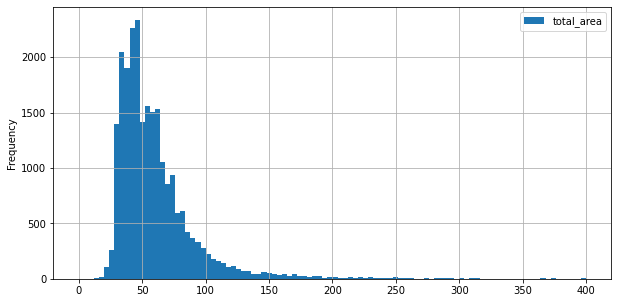

In [34]:
data.plot(kind = 'hist', y = 'total_area', range = (0,400), bins = 100, figsize = (10,5), grid=True)

Мы видим близкое к нормальному распределение данных. Общая площадь в выборке находится в пределах от 12 до 900 кв.м. Большинство квартир представлено с площадью от 25 до 75 кв.м.

* Цена

In [35]:
data['last_price'] = data['last_price'].astype('int')/1000000

Изменим тип данных столбца цены на целочисленные значения, исчисляемые в млн. Тем самым улучшив читаемость цены.

In [36]:
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

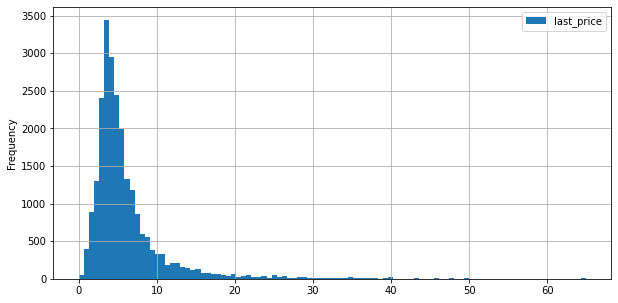

In [37]:
data.plot(kind = 'hist', y = 'last_price', range = (0,65), bins = 100, figsize = (10,5), grid=True)

С ценой всё в порядке. Есть конечно и аномальные значения, например 12190 за квартиру. Но таких значений совсем не много.   
Средняя стоимость квартиры в выборке 6,5 млн. Всех больше квартир стоимостью приблизительно 4 млн.

* Число комнат

In [38]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

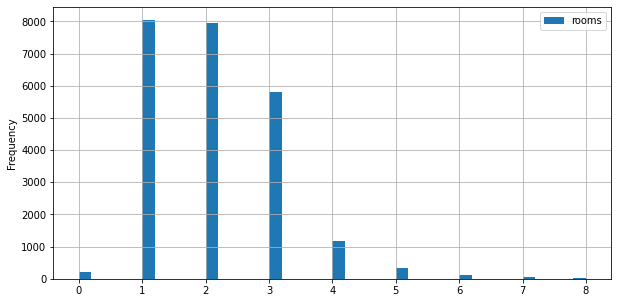

In [39]:
data.plot(kind = 'hist', y = 'rooms', range = (0,8), bins = 40, figsize = (10,5), grid=True)

Если не брать во внимание квартиры с нулевым кол-вом комнат, то с данной выборкой тоже всё в порядке. 
Большинство квартир однокомнатные, двухкомнатные или трехкомнатные.

* Высота потолков

In [40]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

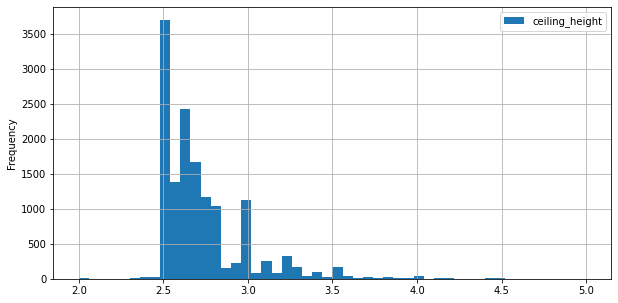

In [41]:
data.plot(kind = 'hist', y = 'ceiling_height', range = (2,5), bins = 50, figsize = (10,5), grid=True)

Преобладают квартиры с высотой потолков 2,5 м. Есть значения в 1 м и 100 м, но они единичны и скорее всего ошибочны. В целом с высотой потолков всё впорядке.

**4.2. Изучим время продажи квартиры: построим гистограмму, посчитаем среднее и медиану.  
Выясним, сколько обычно занимает продажа.**

<AxesSubplot:ylabel='Frequency'>

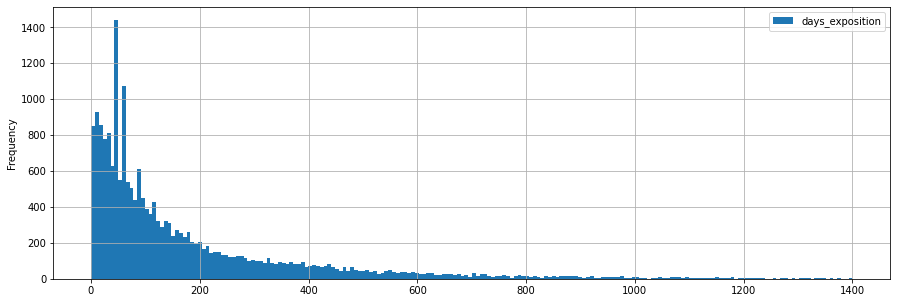

In [42]:
data.plot(kind = 'hist', y = 'days_exposition', range = (1,1400), bins = 200, figsize = (15,5), grid = True)

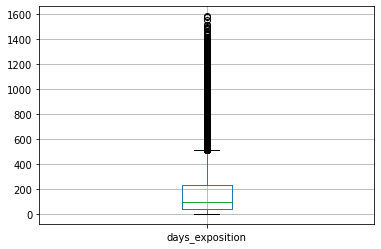

In [43]:
import matplotlib.pyplot as plt
data[data['days_exposition']!=0].boxplot(column='days_exposition')
plt.show()

In [44]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры 180 дней. Медиана же составляет 95 дней.  
Более 50% квартир продаются менее чем за 100 дней.  
Обычно квартира продаётся в диапазоне от 1 до 500 дней. Но есть и исключения: продаж за пределами 500 дней не много, но они всё таки есть. 
Глядя на диаграмму "ящик с усами" можно сказать, что продажа прошла очень быстро, если квартира продалась менее чем за 45 дней. Необычайно долгая продажа, когда квартира продаётся дольше 232 дней. 

**4.3. Уберём редкие и выбивающиеся значения. Опишем особенности.**

<AxesSubplot:ylabel='Frequency'>

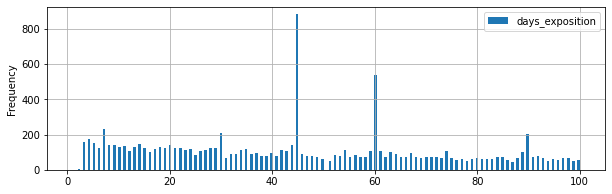

In [45]:
data.plot(kind = 'hist', y = 'days_exposition', range = (1,100), bins = 200, figsize = (10,3), grid = True)

Аномально высокие значения продаж обнаружены на 7, 30, 45, 60 и 90-й дни с начала подачи объявления. Возможно эти числа связаны с регламентными сроками подачи объявлений на сайте. Скорее всего объявления просто снимались с продажи в эти дни, например если человек не оплатил дальнейшее размещение. Значения продаж в эти числа не являются правдивыми, их нужно удалить.

<AxesSubplot:ylabel='Frequency'>

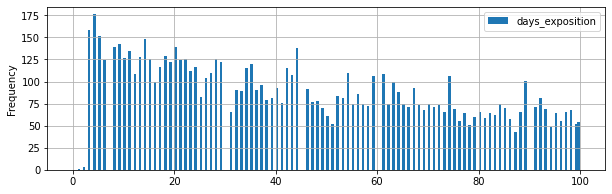

In [46]:
our_list = [0, 7, 30, 45, 60, 90]
real_data = data.query('days_exposition not in @our_list')
real_data.plot(kind = 'hist', y = 'days_exposition', range = (0,100), bins = 200, figsize = (10,3), grid = True)

<AxesSubplot:ylabel='Frequency'>

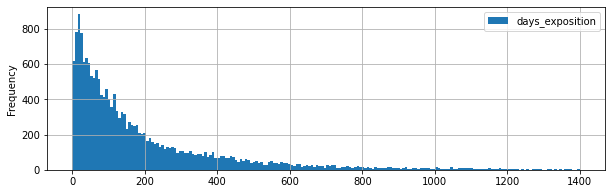

In [47]:
real_data.plot(kind = 'hist', y = 'days_exposition', range = (0,1400), bins = 200, figsize = (10,3), grid = True)

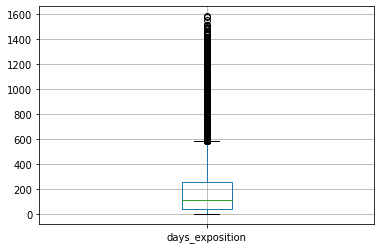

In [48]:
real_data.boxplot(column='days_exposition')
plt.show()

In [49]:
real_data['days_exposition'].describe()

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

После удаления аномальных значений получили следующие выводы:  
Среднее время продажи квартиры выросло до 195 дней;  
Медианное время подросло до 114 дней;  
Время обычной продажи квартиры увеличилось и стало от 1 до 600 дней;
Быстрая продажа теперь, когда время размещения меньше 44 дней;
Долгая продажа, когда время размещения больше 259 дней.

In [50]:
real_data = data.query('last_price > 0.1')
real_data['last_price'].describe()

count    23698.000000
mean         6.541824
std         10.887160
min          0.430000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Убрали из выборки квартиры с подозрительно низкой ценой (менее 100 тыс.) Таких квартир только одна (count уменьшился на 1), она стоила 12190. Удаление одной строки ни как не отразилось на общей выборке.

In [51]:
real_data = data.query('ceiling_height > 2')
real_data['ceiling_height'].describe()

count    14490.000000
mean         2.772386
std          1.261304
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Оставили в выборке квартиры только с высотой потолков более 2 м. При этом из таблицы удалились 14 строк (с потолками от 1 до 2 м). Это ни как не повлияло на выборку. В описании данных изменилось только минимальное значение (теперь потолки начинаются от 2.2 м).

**4.4. Изучим факторы влияющие на стоимость квартиры.**

* Зависимость цены квадратного метра от общей площади квартиры

<AxesSubplot:xlabel='total_area'>

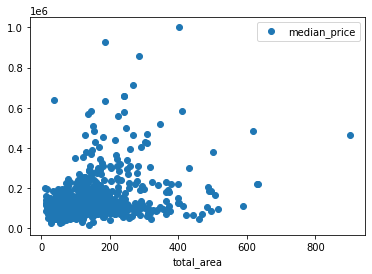

In [52]:
price_from_area = data.pivot_table(index = 'total_area', values = 'price_square_meter', aggfunc = 'median')
price_from_area.columns = ['median_price']
price_from_area.plot(y = 'median_price', style = 'o')

In [53]:
data['total_area'].corr(data['price_square_meter'])

0.30196014387792547

Kоэффициент корреляции Пирсона - 0,3. Значит небольшая зависимость между ценой и площадью квартиры есть: цена квадратного метра незначительно растёт с увеличением общей площади квартиры.

* Зависимость цены квадратного метра от числа комнат

In [54]:
price_from_rooms = data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['count', 'median'])
price_from_rooms.columns = ['count', 'median_price']
price_from_rooms.sort_values('count', ascending = False).head(20)

,count,median_price
rooms,,
1,8047,100000.0
2,7940,92796.0
3,5814,88983.0
4,1180,92666.0
5,326,96516.5
0,197,105555.0
6,105,99411.0
7,59,108827.0
8,12,106760.0


Уберём из выборки квартиры с аномальнобольшим количеством комнат и нулевые значения, для более корректного анализа.

<AxesSubplot:xlabel='rooms'>

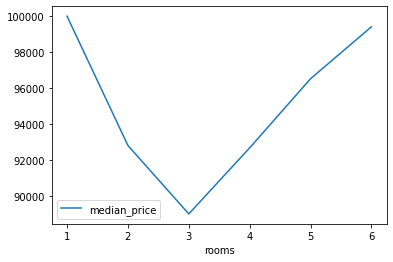

In [55]:
price_from_rooms = price_from_rooms.query('count > 100 and rooms != 0')
price_from_rooms.plot(y = 'median_price')

In [56]:
data['rooms'].corr(data['price_square_meter'])

0.0554194996705922

Kоэффициент корреляции Пирсона - 0,05. Это говорит о том, что линейной зависимости цены квадратного метра от количества комнат нет.  
При этом на получившейся диаграмме мы всё таки видим зависимость: стоимость кв. м. снижается при увеличении количества комнат, вплоть до 3х-комнатных квартир. Затем, наоборот начинается рост цены. Кв.м. однокомнатных квартир дороже чем у двушек и трёшек, так как они более востребованы на рынке и ликвидны. Рост цены 4х, 5ти и 6ти-комнатных квартир возможно обусловлен престижностью. Обычно такие квартиры строят уже в элитном жилом секторе.

* Зависимость цены квадратного метра от удалённости от центра

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_square_meter'>

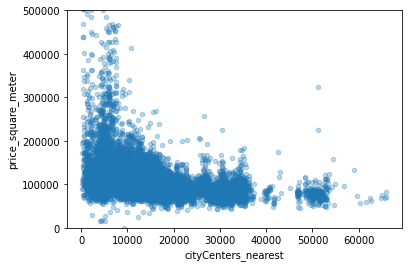

In [57]:
data.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', ylim=(0, 500000), alpha = 0.3)

In [58]:
data['cityCenters_nearest'].corr(data['price_square_meter'])

-0.3179507368286467

Kоэффициент корреляции Пирсона: -0,3. Получили обратную зависимость: при увеличении удалённости от центра стоимость кв.м. жилья снижается. Эта гипотеза подтверждается так же и на диаграмме.

* Зависимость цены квадратного метра от того, на каком этаже расположена квартира

<AxesSubplot:xlabel='what_floor'>

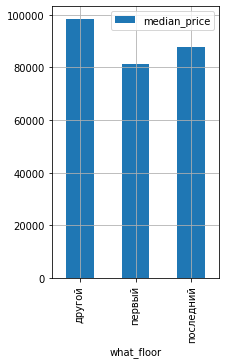

In [59]:
price_from_floor = data.pivot_table(index = 'what_floor', values = 'price_square_meter', aggfunc = 'median')
price_from_floor.columns = ['median_price']
price_from_floor.plot(y = 'median_price', kind='bar', figsize = (3,5), grid = True)

Из столбчатой диаграммы видно, что всех ниже цена за кв.м. жилья на первом этаже. Квартиры на последнем этаже так же можно купиьть со скидкой. Всех дороже по цене средние (не крайние) этажи здания.

* Зависимость цены квадратного метра от даты размещения (дня недели)

,count,median_price
day_add_publication,,
0,3612,94688.0
1,4183,95634.0
2,3974,95473.0
3,4295,95143.0
4,4000,94616.0
5,1936,93545.5
6,1699,94501.0


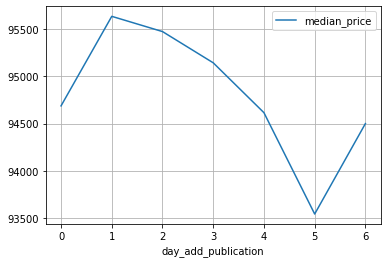

In [60]:
price_from_weekday = data.pivot_table(
    index = 'day_add_publication', values = 'price_square_meter', aggfunc = ['count','median'])
price_from_weekday.columns = ['count','median_price']
price_from_weekday.plot(y = 'median_price', grid = True)
price_from_weekday.sort_values('day_add_publication')

Средняя цена на квартиры выше в объявлениях размещённых в рабочие дни недели. В объявлениях добавленных в выходные - цена за кв.м. ниже. Скорее всего это связано с работой агенств по недвижимости. Из таблицы видно, что количество объявлений возрастает в будние дни, причём в разы. Это подтверждает наше предположение об агенствах.

* Зависимость цены квадратного метра от даты размещения (месяца)

,count,median_price
month_add_publication,,
1,1500,95222
2,2640,95000
3,2587,95238
4,2379,96451
5,1274,92857
6,1760,92799
7,1695,95000
8,1744,96026
9,1981,95607


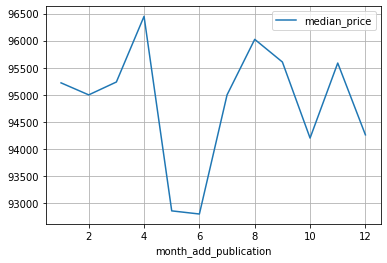

In [61]:
price_from_month = data.pivot_table(
    index = 'month_add_publication', values = 'price_square_meter', aggfunc = ['count', 'median'])
price_from_month.columns = ['count', 'median_price']
price_from_month.plot(y = 'median_price', grid = True)
price_from_month.sort_values('month_add_publication')

По гистограмме видно, что у рынка недвижимости существует своя сезонность. В мае и июне цены на квартиры самые низкие. В это время начинается период отпусков, количество объявлений снижается (это видно из таблицы), вместе с ним снижается и средняя цена кв.м. Самая высокая стоимость квартир весной (в апреле) и в начале осени (август - сентябрь). Люди возвращаются из отпусков, количество объявлений растёт, возрастает средняя цена. 

* Зависимость цены квадратного метра от даты размещения (года)

,count,median_price
year_add_publication,,
2014,137,107000.0
2015,1191,93414.0
2016,2783,91743.0
2017,8190,92564.5
2018,8519,95689.0
2019,2879,103305.0


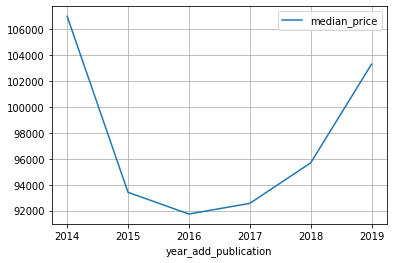

In [62]:
price_from_year = data.pivot_table(
    index = 'year_add_publication', values = 'price_square_meter', aggfunc = ['count', 'median'])
price_from_year.columns = ['count', 'median_price']
price_from_year.plot(y = 'median_price', grid = True)
price_from_year.sort_values('year_add_publication')

По гистограмме четко виден рост стоимости кв.м. жилья начиная с 2016 года. Данный рост обусловлен многими фаторами, такими как: инфляция, доступная ипотека, гос. программы и т.д. Из таблицы видно, что с каждым годом количество предложений о продажи квартир  стремительно увеличивается. Это так же связано с указанными ранее факторами.  
По крайним годам (2014 и 2019) анализ нужно делать с осторожностью, так как по ним представленна не полная информация. В 2014 году собраны данные всего лишь за период чуть больше 1 месяца, в 2019 г. есть информация за 4 полных месяца. Это видно из таблици представленной ниже.

In [63]:
data.sort_values('first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_add_publication,month_add_publication,year_add_publication,what_floor,living_area_ratio,kitchen_area_ratio
10132,2,16.13700,154.76,2014-11-27,4,2.70,20.0,67.81,20,False,...,0,113.0,573,104271,3,11,2014,последний,0.44,0.21
8393,10,8.03700,56.20,2014-11-27,1,NaN,5.0,24.20,5,False,...,1,214.0,972,143007,3,11,2014,последний,0.43,0.23
15857,6,25.00000,145.20,2014-11-27,3,NaN,5.0,60.70,5,False,...,0,NaN,0,172176,3,11,2014,последний,0.42,0.28
2831,9,5.99000,64.40,2014-11-27,2,3.12,4.0,36.20,1,False,...,1,NaN,1069,93012,3,11,2014,первый,0.56,0.23
696,1,3.36493,34.69,2014-11-27,1,2.64,25.0,23.43,25,False,...,0,NaN,574,97000,3,11,2014,последний,0.68,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,20,10.00000,62.30,2019-05-03,2,NaN,6.0,20.00,3,False,...,2,NaN,0,160513,4,5,2019,другой,0.32,0.48
5986,0,5.00000,48.00,2019-05-03,3,2.50,9.0,NaN,2,False,...,0,NaN,0,104166,4,5,2019,другой,NaN,NaN
9217,7,4.30000,35.70,2019-05-03,1,2.70,21.0,15.00,12,False,...,0,NaN,0,120448,4,5,2019,другой,0.42,0.36
21887,0,5.60000,61.60,2019-05-03,3,2.50,9.0,42.00,5,False,...,1,NaN,0,90909,4,5,2019,другой,0.68,0.13


**4.5. Анализ 10 населённых пунктов с наибольшим числом объявлений.**

Сформируем таблицу из 10 населённых пунктов с наибольшим числом объявлений, и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [64]:
price_from_locality = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
price_from_locality.columns = ['number_of_ads', 'mean_price']
price_from_locality.sort_values('number_of_ads', ascending = False).head(10)

,number_of_ads,mean_price
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Из таблицы видно, что Санкт-Петербург - населённый пункт с самой высокой стоимостью жилья. Цена кв.м. в нём в среднем составляет 115 тыс.  
Населённый пункт с самой низкой стоимостью жилья это Выборг. Цена кв.м. в нём в среднем составляет 58 тыс.

**4.6. Анализ предложения квартир в Санкт-Петербурге.**

Для удобства анализа создадим столбец с расстоянием до центра в километрах

In [65]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

Для возможности округления расстояний до целых значений, нужно избавиться от пропусков. Заменим пропуски на нереально большое число (например 1000 км от центра), для того чтобы не смешивать их с уже имеющимися значениями (в том числе с 0).  
Затем изменим тип данных на int.

In [66]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1000).astype('int')

Создадим сводную таблицу и проанализируем получившиеся данные

,number_of_ads,mean_price
cityCenters_nearest_km,,
0,86,138536.5
1,240,123966.0
2,307,116363.0
3,526,110079.5
4,907,126086.0
5,769,126041.0
6,470,134117.0
7,407,125000.0
8,670,114137.0


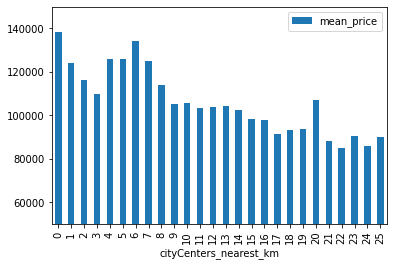

In [67]:
piter_cityCenters = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=1000').pivot_table(
    index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = ['count', 'median'])
piter_cityCenters.columns = ['number_of_ads', 'mean_price']
piter_cityCenters[piter_cityCenters['number_of_ads'] > 10].plot(y = 'mean_price', ylim=(50000, 150000), kind='bar')
piter_cityCenters

Убрали из диаграммы единичные объявления, которые искажали общую картину.  
Видим следующее: цена за кв.м. возрастает по мере сокращения расстояния до центра, это логично. При этом до 8го километра наблюдаем плавное возрастание цены, а начиная с 8го км. идёт резкое увеличение цены. Скорее всего центральная зона Санкт-Петербурга как раз и находится в радиусе 8 км. от центра.

**4.7. Анализ сегмента квартир в центре.**

Выделим сегмент квартир в центре Санкт-Петербурга (в радиусе 8 км).

In [68]:
piter_сenter_segment = data.query('cityCenters_nearest_km <= 8 and locality_name == "Санкт-Петербург"')

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [69]:
piter_сenter_segment['total_area'].describe()

count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

Число квартир в центральном сегменте: 4382.  
В отношении общей площади видим тенденцию к увеличению, в сравнении с другими частями города. Среднее значение площади выросло до 88 кв.м., для города было 60 кв.м. То есть в центре города находятся квартиры с большей площадью, чем в других районах.

In [70]:
piter_сenter_segment['last_price'].describe()

count    4382.000000
mean       13.768752
std        22.961364
min         1.600000
25%         6.207104
50%         8.707500
75%        13.500000
max       763.000000
Name: last_price, dtype: float64

Известно, что квартиры в центре города дороже. Это подтверждается и нашими данными. Средняя стоимость квартиры в центре 13,7 млн., против 6,5 млн. в других частях города. Цена недвижимости в центре начинается от 1,6 млн., дешевле нет. 

<AxesSubplot:ylabel='Frequency'>

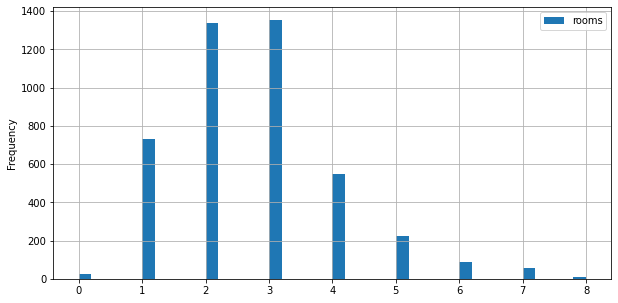

In [71]:
piter_сenter_segment.plot(kind = 'hist', y = 'rooms', range = (0,8), bins = 40, figsize = (10,5), grid=True)

Как видно из гистограммы, в центре преобладают многокомнатные квартиры. Тогда как в других районах города на лидирующих позициях были однокомнатные квартиры.

<AxesSubplot:ylabel='Frequency'>

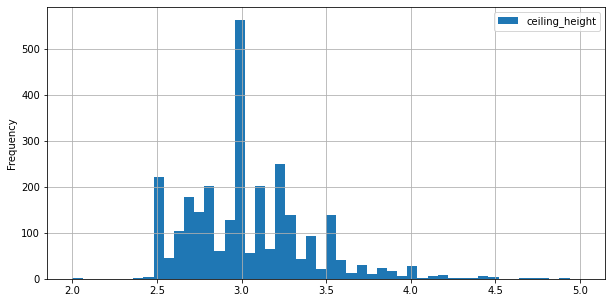

In [72]:
piter_сenter_segment.plot(kind = 'hist', y = 'ceiling_height', range = (2,5), bins = 50, figsize = (10,5), grid=True)

Высота потолков в квартирах в центре выше. Большинство квартир с 3-х метровыми потолками. В других районах преобладали потолки высотой 2,5 м.

* Зависимость цены квадратного метра от числа комнат квартиры в центре города

<AxesSubplot:xlabel='rooms'>

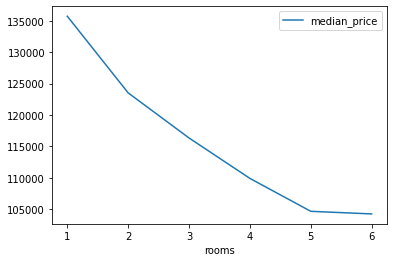

In [73]:
piter_сenter_rooms = piter_сenter_segment.pivot_table(
    index = 'rooms', values = 'price_square_meter', aggfunc = ['count', 'median'])
piter_сenter_rooms.columns = ['count', 'median_price']
piter_сenter_rooms = piter_сenter_rooms.query('count > 80 and rooms != 0')
piter_сenter_rooms.plot(y = 'median_price')

In [74]:
piter_сenter_segment['rooms'].corr(data['price_square_meter'])

0.02059641528268521

Коэффициент корреляции практически равен 0. Следовательно прямой связи между ценой кв.м. и количеством комнат квартиры в центре нет.  
При этом по гистограмме видно, что цена кв.м. жилья в центре города снижается с увеличением количества комнат. В других частях города стоимость возрастала у квартир с более чем 3мя комнатами. Например стоимость кв.м. у 6-ти комнатных и однокомнатных квартир была практически равная. В центре же ситуация совсем иная: стоимость кв.м. 1-комнатной и 6-комнатной квартир различаются значительно. 

* Зависимость цены квадратного метра от того, на каком этаже расположена квартира в центре города

<AxesSubplot:xlabel='what_floor'>

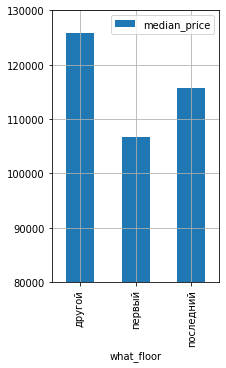

In [75]:
piter_сenter_floor = piter_сenter_segment.pivot_table(index = 'what_floor', values = 'price_square_meter', aggfunc = 'median')
piter_сenter_floor.columns = ['median_price']
piter_сenter_floor.plot(y = 'median_price', kind='bar', figsize = (3,5), ylim=(80000, 130000), grid = True)

Медианная цена на квартиры в центре города намного выше, чем в других районах. При этом зависимоть стоимости кв.м. от этажа абсолютно такая же. Самые дешёвые первые этажи, затем по стоимости идут последние этажи и замыкают тройку этажи по середине сдания - на них самые дорогие цены.

* Зависимость цены квадратного метра от удалённости от центра (анализ центрального сегмента)

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_square_meter'>

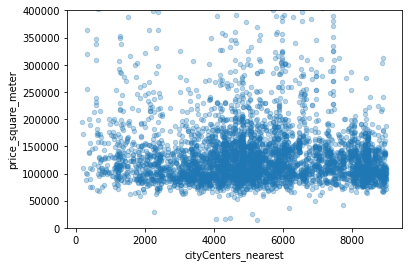

In [76]:
piter_сenter_segment.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest', ylim=(0, 400000), alpha = 0.3)

In [77]:
piter_сenter_segment['cityCenters_nearest'].corr(data['price_square_meter'])

-0.08776201584325058

Коэффициент корреляции стремится к нулю. Гистограмма подтверждает данное значение. В центральной части города цена кв.м. одинаково дорогая. На 1 км. ближе к центру или на 1 км. дальше от центра - значения не имеет.

* Зависимость цены квадратного метра в центре города от даты размещения (дня недели)

,count,median_price
day_add_publication,,
0,662,123329.5
1,752,120102.0
2,748,122896.0
3,897,121351.0
4,738,122300.5
5,326,124755.0
6,259,125482.0


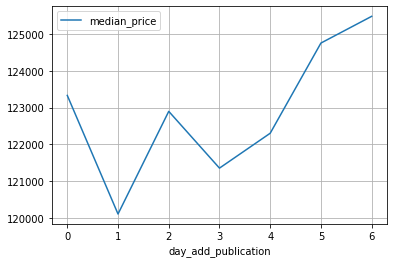

In [78]:
piter_сenter_weekday = piter_сenter_segment.pivot_table(
    index = 'day_add_publication', values = 'price_square_meter', aggfunc = ['count','median'])
piter_сenter_weekday.columns = ['count','median_price']
piter_сenter_weekday.plot(y = 'median_price', grid = True)
piter_сenter_weekday.sort_values('day_add_publication')

Количество объявлений в будние дни в разы больше чем в выходные - ситуация идентичная с общей выборкой. В центральной части города так же работают агенты по недвижимости. Но на гистограмме ситуация обратная: стоимость кв.м. в центре города выше в объявлениях поданых в выходные дни. В будни цена в объявлениях ниже.  
Предположительно, что в выходные дни объявления подают собственники квартир. Владельцы недвижимости в центре скорее всего  обеспеченные люди, не спешащие снижать цену. При этом в будни включаются в работу агенства. Из-за высокой стоимости, квартиры в центре имеют меньшую ликвидность, по этому для достижения цели скорейшей продажи агенты вынуждены снижать цену. 

* Зависимость цены квадратного метра в центре города от даты размещения (месяца)

,count,median_price
month_add_publication,,
1,271,126966.0
2,460,120746.5
3,472,129373.0
4,414,122756.5
5,258,125112.0
6,340,116686.0
7,352,119545.0
8,325,125000.0
9,388,122448.0


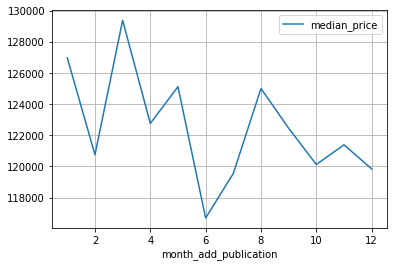

In [79]:
piter_сenter_month = piter_сenter_segment.pivot_table(
    index = 'month_add_publication', values = 'price_square_meter', aggfunc = ['count', 'median'])
piter_сenter_month.columns = ['count', 'median_price']
piter_сenter_month.plot(y = 'median_price', grid = True)
piter_сenter_month.sort_values('month_add_publication')

По месяцам ситуация схожа с общей выборкой. Самая высокая цена кв.м. и самое большое количество объявлений о продаже весной (в марте-апреле). Самая низкая цена и всех меньше объявлений летом в июне (в сезон отпусков). Осенью цена снова подрастает. 
Возрастание и падение цены в период календарного года связано с человеческой активностью, как и во многих других сферах жизнедеятельности.

* Зависимость цены квадратного метра в центре города от даты размещения (года)

,count,median_price
year_add_publication,,
2014,38,141885.0
2015,368,119911.5
2016,591,119047.0
2017,1552,119382.5
2018,1347,123110.0
2019,486,133333.0


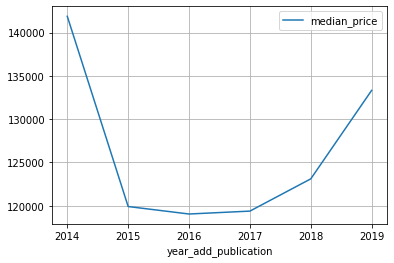

In [80]:
piter_сenter_year = piter_сenter_segment.pivot_table(
    index = 'year_add_publication', values = 'price_square_meter', aggfunc = ['count', 'median'])
piter_сenter_year.columns = ['count', 'median_price']
piter_сenter_year.plot(y = 'median_price', grid = True)
piter_сenter_year.sort_values('year_add_publication')

Гистограмма идентична той, что мы строили для всей выборки в целом. Начиная с 2016 года стоимость недвижимости растёт год от года. Центральная часть Санкт-Петербурга в этом плане ни чем не отличается от других регионов.

### Шаг 5. Общий вывод

В начале исследования мы определили и изучили пропущенные значения, заполнили пропуски там где это было уместно, привели данные к нужным типам. Посчитали и добавили в таблицу: цену квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади, а также отношение площади кухни к общей. Затем мы изучили и построили гистограммы для параметров площади, цены, числа комнат и высоты потолков.  
Следующим этапом был исследовательский анализ. В процессе изучения времени продажи квартиры мы обнаружили аномально высокие значения продаж на 7, 30, 45, 60 и 90-й дни с начала подачи объявления. Данные значения были удалены из выборки, так как они были связаны с автоматическим снятием объявлений с продажи. **После удаления аномальных значений, при помощи диаграммы размаха мы установили стандартное время продажи квартиры: от 1 до 600 дней. Выявили факторы влияющие на стоимость квадратного метра. Всех больше на него влияют: количество комнат, удаленность от центра и этаж на котором располагается недвижимость.** Незначительно на цену кв.м. влияет сезонность. Скачки цен в период календарного года связаны с человеческой активностью, это мы показали на графиках. **В разрезе лет увидели рост стоимости жилья начиная с 2016 г., год от года цена увеличивается.**  
Изучая график цен, определили область с резким изменением стоимости кв.м. в зависимости от удалённости центра: центральная зона Санкт-Петербурга находится в радиусе 8 км. от центра. **Квартиры в центре имеют большую площадь, высота потолков в них выше, число комнат больше. Стоимсоть квадратного метра в центре города на порядок дороже других районов. При этом во всей центральной части (в радиусе 8 км) цена кв.м. практически не меняется в зависимости от расположения.** Однако с увеличением числа комнат стоимость кв.м. уменьшается. В отношении других параметров изменение цены кв.м. жилья в центре Санкт-Петербурга схоже с изменением цены в других районах (во всей выборке в целом). Жильё в центре так же дорожает начиная с 2016г.